# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></div><div class="lev1 toc-item"><a href="#Import-packages" data-toc-modified-id="Import-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import packages</a></div><div class="lev1 toc-item"><a href="#Making-the-encoder" data-toc-modified-id="Making-the-encoder-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Making the encoder</a></div><div class="lev1 toc-item"><a href="#Making-the-decoder" data-toc-modified-id="Making-the-decoder-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making the decoder</a></div><div class="lev1 toc-item"><a href="#Connecting-encoder-and-decoder" data-toc-modified-id="Connecting-encoder-and-decoder-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Connecting encoder and decoder</a></div><div class="lev1 toc-item"><a href="#Load-data" data-toc-modified-id="Load-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Load data</a></div><div class="lev1 toc-item"><a href="#Set-up-tensorboard" data-toc-modified-id="Set-up-tensorboard-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Set up tensorboard</a></div><div class="lev1 toc-item"><a href="#Training-and-validation-phase" data-toc-modified-id="Training-and-validation-phase-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training and validation phase</a></div><div class="lev2 toc-item"><a href="#If-we-already-have-the-weights-then-load-them" data-toc-modified-id="If-we-already-have-the-weights-then-load-them-81"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>If we already have the weights then load them</a></div><div class="lev1 toc-item"><a href="#Save-output-and-display-summary" data-toc-modified-id="Save-output-and-display-summary-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save output and display summary</a></div><div class="lev1 toc-item"><a href="#Results" data-toc-modified-id="Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Results</a></div><div class="lev2 toc-item"><a href="#Parsing-the-encoded-representation" data-toc-modified-id="Parsing-the-encoded-representation-101"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Parsing the encoded representation</a></div><div class="lev1 toc-item"><a href="#View-the-model-we-created" data-toc-modified-id="View-the-model-we-created-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>View the model we created</a></div>

# Summary

This tutorial is taken from the [keras website](https://blog.keras.io/building-autoencoders-in-keras.html). 

# Import packages

In [1]:
from keras import backend as K

from keras.layers import Input, Conv2D, Dense, MaxPooling2D, UpSampling2D
from keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist

Using TensorFlow backend.


# Making the encoder

In [2]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)

In [47]:
encoder = Model(input_img, encoded, name='encoder')

In [57]:
input_img

<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [58]:
encoder.inputs[0]

<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [59]:
my_ae = Model(encoder.inputs, decoder(encoder(encoder.inputs)))

In [60]:
my_ae.compile(optimizer='adadelta', loss='binary_crossentropy')

In [63]:
my_ae.load_weights('./convolutional_autoencoder_weights.h5')

# Making the decoder

In [4]:
input_enc = Input(shape=(4,4,8))
y = Conv2D(8, (3, 3), activation='relu', padding='same')(input_enc)
y = UpSampling2D((2, 2))(y)
y = Conv2D(8, (3, 3), activation='relu', padding='same')(y)
y = UpSampling2D((2, 2))(y)
y = Conv2D(16, (3, 3), activation='relu')(y)
y = UpSampling2D((2, 2))(y)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(y)

In [48]:
decoder = Model(input_enc, decoded, name='decoder')

# Connecting encoder and decoder

In [ ]:
# # Old code:
# input_ae = Input(shape=(28,28,1))
# output_enc = encoder(input_ae)
# output_ae = decoder(output_enc)
# autoencoder = Model(input_ae, output_ae)

# # More recent old code:
# autoencoder = Model(encoder.get_input_at(0), decoder(encoder.get_output_at(-1)))

In [49]:
autoencoder = Model(input_img, decoder(encoder(input_img)), name='autoencoder')

In [50]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Load data

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# Set up tensorboard

Run the following bash code in a Terminal. Probably remove this directory if it already exists. 

In [ ]:
# !tensorboard --logdir=/tmp/autoencoder

In [11]:
from keras.callbacks import TensorBoard

# Training and validation phase

## If we already have the weights then load them

In [51]:
autoencoder.load_weights('./convolutional_autoencoder.h5')

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 90s - loss: 0.2473 - val_loss: 0.1713
Epoch 2/50
60000/60000 [==============================] - 90s - loss: 0.1629 - val_loss: 0.1549
Epoch 3/50
60000/60000 [==============================] - 90s - loss: 0.1477 - val_loss: 0.1442
Epoch 4/50
60000/60000 [==============================] - 90s - loss: 0.1387 - val_loss: 0.1324
Epoch 5/50
60000/60000 [==============================] - 89s - loss: 0.1334 - val_loss: 0.1352
Epoch 6/50
60000/60000 [==============================] - 86s - loss: 0.1296 - val_loss: 0.1267
Epoch 7/50
60000/60000 [==============================] - 90s - loss: 0.1266 - val_loss: 0.1263
Epoch 8/50
60000/60000 [==============================] - 87s - loss: 0.1241 - val_loss: 0.1210
Epoch 9/50
60000/60000 [==============================] - 88s - loss: 0.1225 - val_loss: 0.1217
Epoch 10/50
60000/60000 [==============================] - 86s - loss: 0.1210 - val_lo

# Save output and display summary

In [12]:
from keras.models import model_from_json
import json

In [13]:
autoencoder_json = autoencoder.to_json()
with open('./convolutional_autoencoder.json', 'w') as fp:
    fp.write(autoencoder_json)

Example of how to load from json:

In [15]:
with open('./convolutional_autoencoder.json', 'r') as fp:
    new_ae_json = fp.read()
new_ae = model_from_json(new_ae_json)

In [13]:
autoencoder.save('./convolutional_autoencoder.h5')
autoencoder.save_weights('./convolutional_autoencoder_weights.h5')

In [12]:
autoencoder.count_params()

4385

In [13]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
model_1 (Model)              (None, 4, 4, 8)           1904      
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         2481      
Total params: 4,385.0
Trainable params: 4,385.0
Non-trainable params: 0.0
_________________________________________________________________


In [14]:
autoencoder.layers[1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
Total para

In [15]:
autoencoder.layers[-1].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 8)           584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 16)        0         
__________

# Results

In [52]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

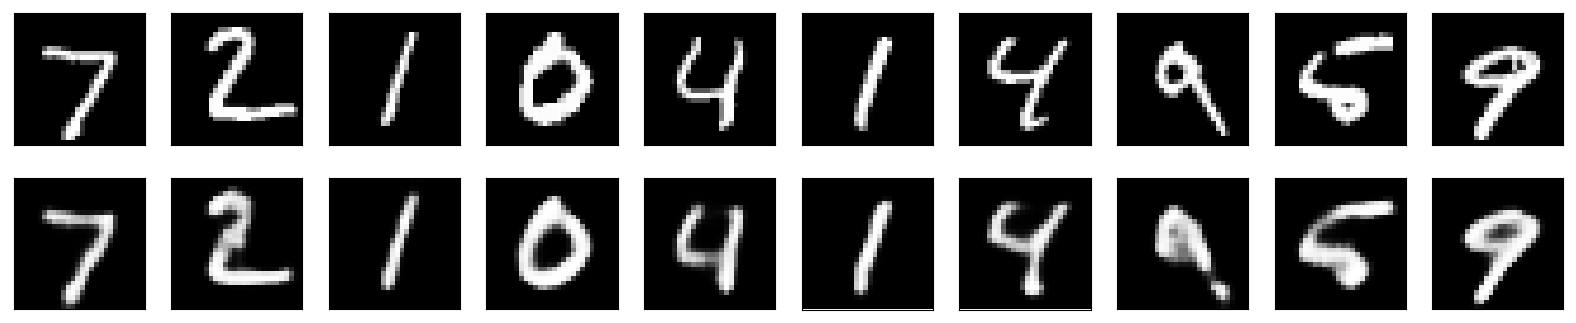

In [53]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

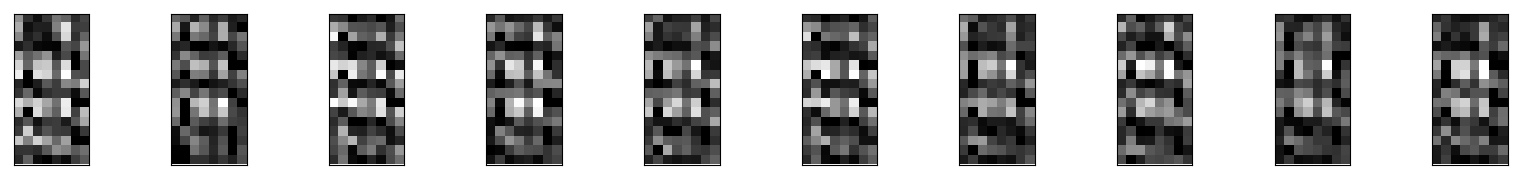

In [54]:
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(16, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## Parsing the encoded representation

Let's try to determine what each pixel in the implicit representation is encoding for. 

In [27]:
encoding_dim = encoder.output_shape[1:]
encoding_size = np.prod(encoding_dim)

In [63]:
encoding_basis = 2*np.eye(encoding_size).reshape(encoding_size, *encoding_dim)

In [64]:
decoded_basis = decoder.predict(encoding_basis)

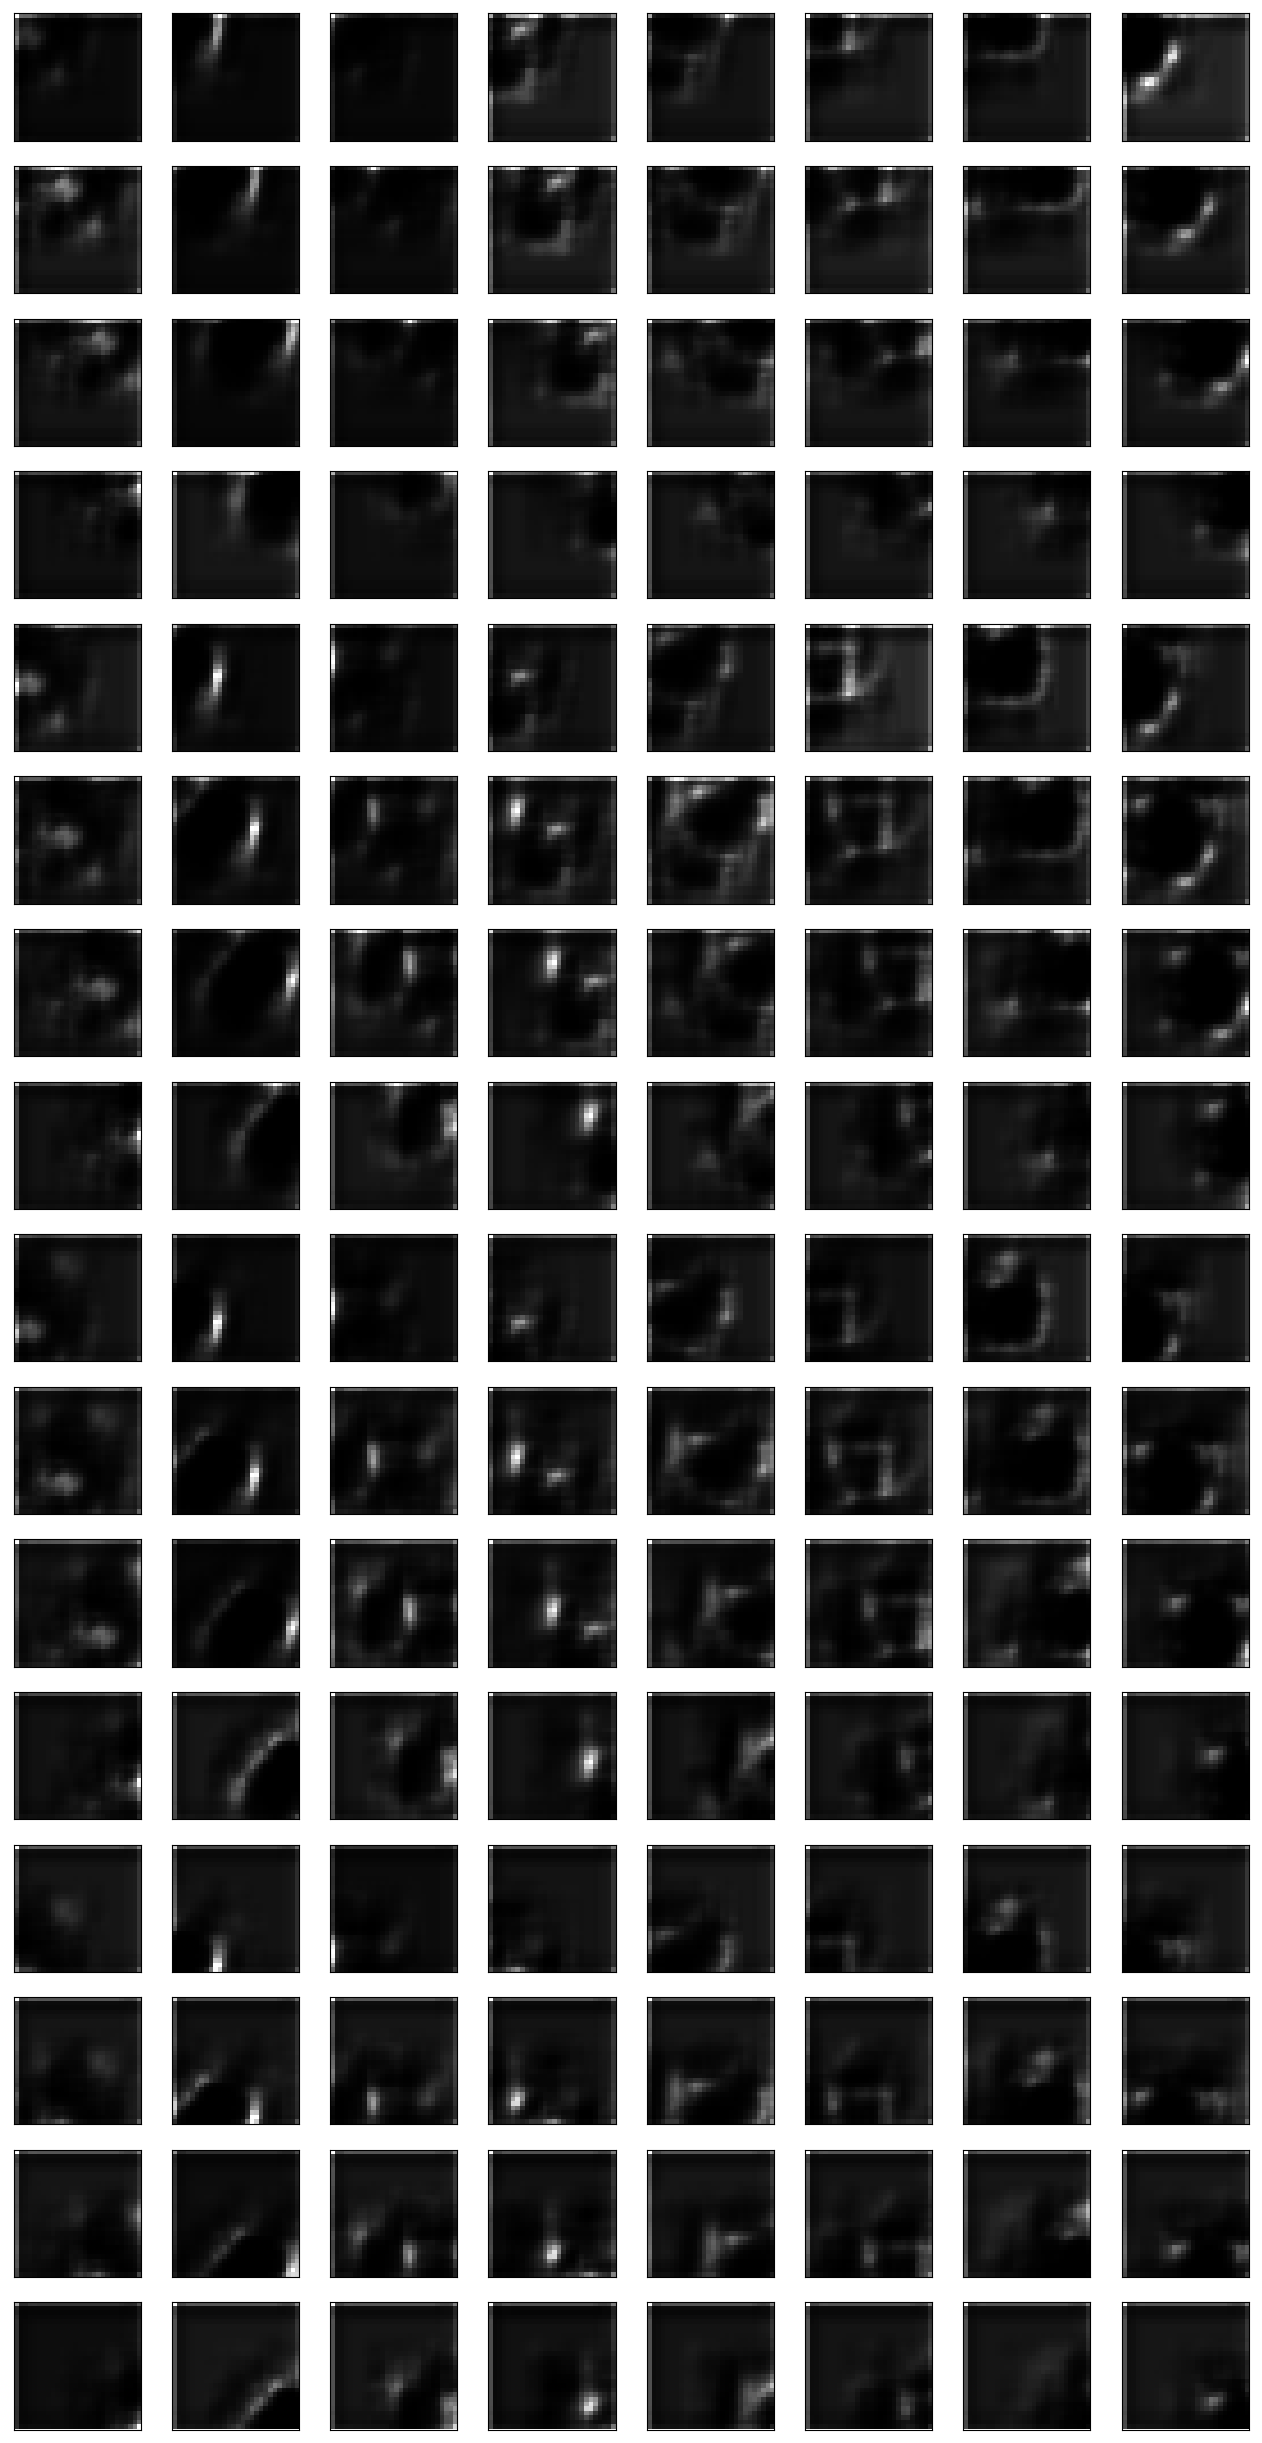

In [65]:
n = 8
plt.figure(figsize=(2*n,2*encoding_size/n))
for i in range(encoding_size):
    ax = plt.subplot(encoding_size/n, n, i+1)
    plt.imshow(np.log1p(decoded_basis[i].reshape(28,28)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# View the model we created

In [17]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='autoencoder_graph.png')
plot_model(encoder, to_file='encoder_graph.png')
plot_model(decoder, to_file='decoder_graph.png')

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [26]:
ae_dot = model_to_dot(autoencoder, show_shapes=True)
enc_dot = model_to_dot(encoder, show_shapes=True)
dec_dot = model_to_dot(decoder, show_shapes=True)

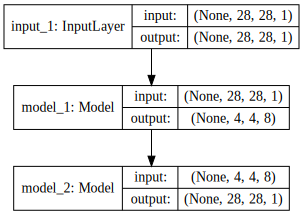

In [46]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

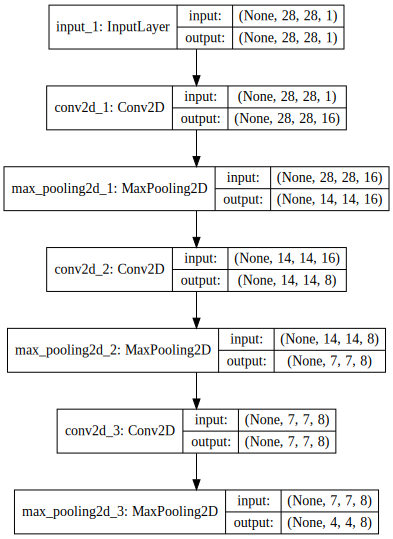

In [45]:
SVG(model_to_dot(encoder, show_shapes=True).create(prog='dot', format='svg'))

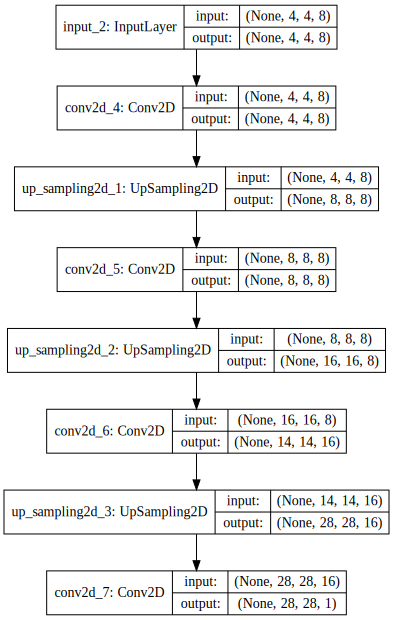

In [44]:
SVG(model_to_dot(decoder, show_shapes=True).create(prog='dot', format='svg'))